In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/pintoza/Desktop/dev/data-science/sales_optimization/data/processed/df_processed.csv')

df.head()

,order_number,sales_channel,warehouse_code,procured_date,order_date,ship_date,delivery_date,sales_team_id,customer_id,store_id,product_id,order_quantity,discount_applied,unit_cost,unit_price
0,101,In-Store,4,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,5,0.075,1001,1963
1,102,Online,3,2017-12-31,2018-05-31,2018-06-22,2018-07-02,14,20,196,27,3,0.075,3349,3940
2,103,Distributor,4,2017-12-31,2018-05-31,2018-06-21,2018-07-01,21,16,213,16,1,0.050,781,1776
3,104,Wholesale,3,2017-12-31,2018-05-31,2018-06-02,2018-06-07,28,48,107,23,8,0.075,1465,2325
4,105,Distributor,3,2018-04-10,2018-05-31,2018-06-16,2018-06-26,22,49,111,26,8,0.100,1476,1822


count    7991.000000
mean        0.114394
std         0.085570
min         0.050000
25%         0.050000
50%         0.075000
75%         0.150000
max         0.400000
Name: discount_applied, dtype: float64


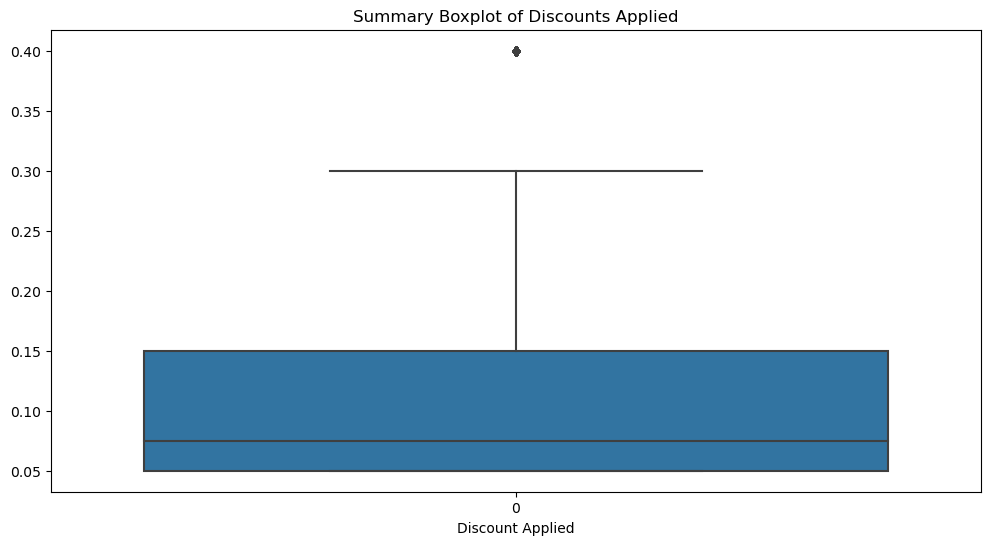

In [3]:
# Calculate metrics
discount_summary = df['discount_applied'].describe()
print(discount_summary)

# Generate Boxplot for Discounts
plt.figure(figsize=(12, 6))
sns.boxplot(df['discount_applied'])
plt.title('Summary Boxplot of Discounts Applied')
plt.xlabel('Discount Applied')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/discount_analysis/discount_summary.png')
plt.show()

# Metrics: Mean, Median, Standard Deviation of Discounts Applied

-0.0077331491187061785


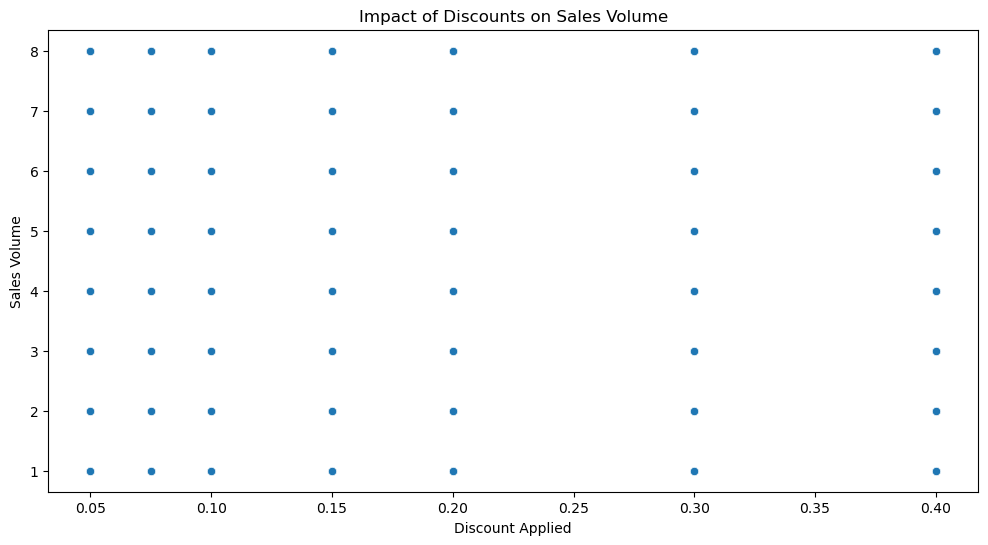

In [4]:
# Calculate metrics: Correlation between 'discount_applied' and 'order_quantity'
correlation_discount_sales_volume = df['discount_applied'].corr(df['order_quantity'])
print(correlation_discount_sales_volume)

# Generate Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='discount_applied', y='order_quantity', data=df)
plt.title('Impact of Discounts on Sales Volume')
plt.xlabel('Discount Applied')
plt.ylabel('Sales Volume')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/discount_analysis/impact_on_sales_volume.png')
plt.show()

# Metrics: Correlation Coefficient

0.0017637361665281384


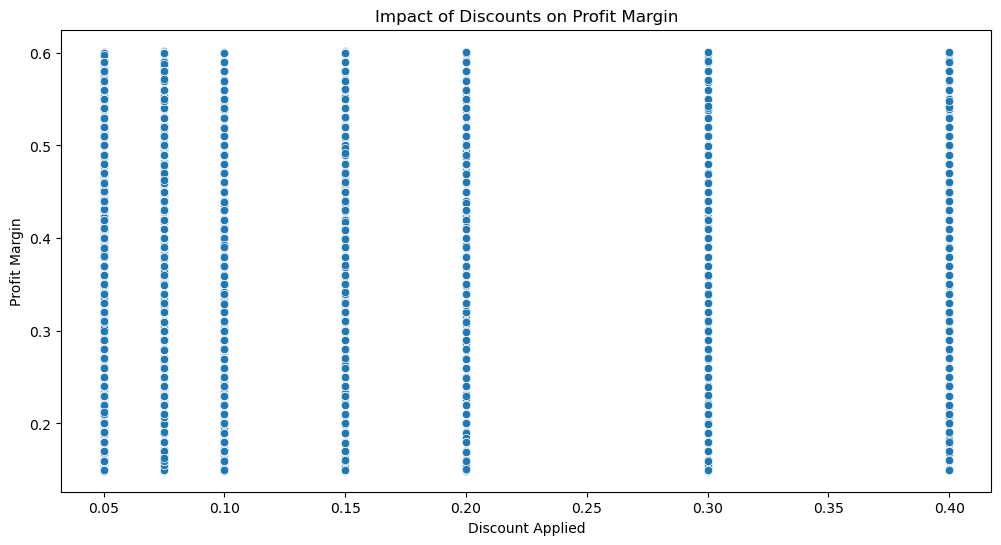

In [6]:
# Calculate metrics: Correlation between 'discount_applied' and 'profit_margin'
df['profit_margin'] = (df['unit_price'] - df['unit_cost']) / df['unit_price']
correlation_discount_profit_margin = df['discount_applied'].corr(df['profit_margin'])
print(correlation_discount_profit_margin)

# Generate Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='discount_applied', y='profit_margin', data=df)
plt.title('Impact of Discounts on Profit Margin')
plt.xlabel('Discount Applied')
plt.ylabel('Profit Margin')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/discount_analysis/impact_on_profit_margin.png')
plt.show()

# Metrics: Correlation Coefficient

In [7]:
from reportlab.lib.pagesizes import letter, landscape
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Image
from reportlab.lib.styles import getSampleStyleSheet

# Create a PDF file
pdf = SimpleDocTemplate(
    "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/insights/Discount_Analysis_Insights.pdf",
    pagesize=letter
)

# Set the styles
styles = getSampleStyleSheet()
styleN = styles["BodyText"]

# Add Title
elements = []
elements.append(Paragraph("Discount Analysis Insights", styles["Heading1"]))

# Insert insights text
insights_text = """
1. Discount Summary: <br/>
   - Quite right-skewed. Most discounts are relatively small in size <br/>
   
<br/>

2. Discount Impact on Sales Volume: <br/>
   - Neglible impact <br/>

<br/>

3. Discount Impact on Profit Margins <br/>
   - Neglible impact <br/>
   
"""
elements.append(Paragraph(insights_text, styleN))

# Insert Images (Your charts saved as PNG files)
img_path1 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/discount_analysis/discount_summary.png"
img1 = Image(img_path1, width=200, height=200)
elements.append(img1)

img_path2 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/discount_analysis/impact_on_sales_volume.png"
img2 = Image(img_path2, width=200, height=200)
elements.append(img2)

img_path3 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/discount_analysis/impact_on_profit_margin.png"
img3 = Image(img_path3, width=200, height=200)
elements.append(img3)

# Generate PDF
pdf.build(elements)